# Feature Selection(After all the preprocessing)

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.stat import Correlation
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

In [23]:
all_house = pd.read_csv('../data/curated/2017_2022_house_data_final.csv')

In [24]:
all_house = all_house[all_house['real_school_distance'] != 'school_distance_txt']
all_house = all_house[all_house['real_school_duration'] != 'school_duration_txt']
all_house = all_house[all_house['real_station_distance'] != 'station_distance_txt']
all_house = all_house[all_house['real_station_duration'] != 'station_duration_txt']
all_house['real_school_distance'] = all_house['real_school_distance'].astype(float)
all_house['real_school_duration'] = all_house['real_school_duration'].astype(float)
all_house['real_station_duration'] = all_house['real_station_duration'].astype(float)
all_house['real_station_distance'] = all_house['real_station_distance'].astype(float)

# Draw a heatmap to have a brief knowledge about the correlation between features

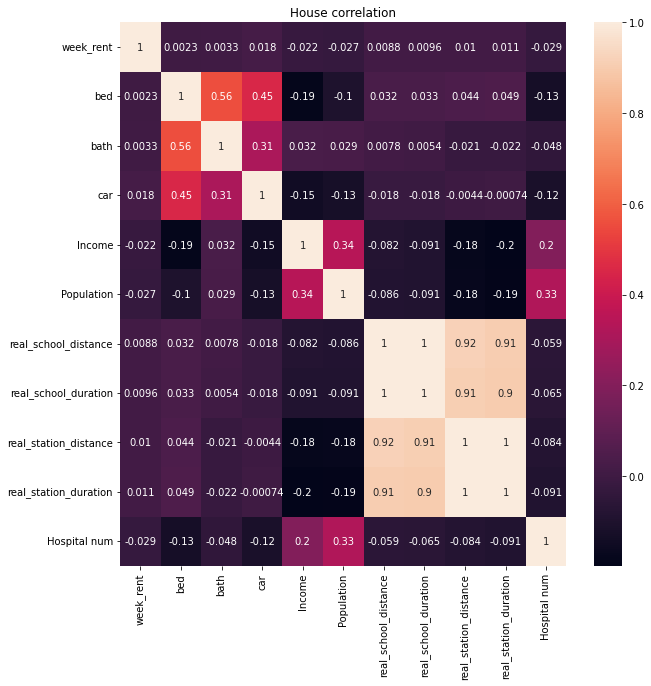

In [25]:
CORR_COLS=['week_rent','bed','bath','car','Income','Population','real_school_distance',
       'real_school_duration', 'real_station_distance',
       'real_station_duration','Hospital num']
f, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(all_house[CORR_COLS].corr(),annot=True)
plt.title('House correlation')
plt.show()

# Feature selection using Random Forest Method

# （mean decrease accuracy）
Calculating the decreasing amount of the model accuracy if we remove each feature in order \n
-Reduces Training Time
-Improves accuracy of the model

In [26]:
X = all_house[['years','postcode','bed','bath','car','Income','Population','real_school_distance',
       'real_school_duration', 'real_station_distance',
       'real_station_duration','Hospital num']]
Y = all_house['week_rent']
names = ['years','postcode','bed','bath','car','Income','Population','real_school_distance',
       'real_school_duration', 'real_station_distance',
       'real_station_duration','Hospital num']
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.1618, 'real_school_duration'), (0.1557, 'real_school_distance'), (0.1261, 'Population'), (0.1215, 'real_station_duration'), (0.1017, 'real_station_distance'), (0.0958, 'postcode'), (0.079, 'bath'), (0.0525, 'Income'), (0.0499, 'car'), (0.0312, 'bed'), (0.0175, 'years'), (0.0074, 'Hospital num')]


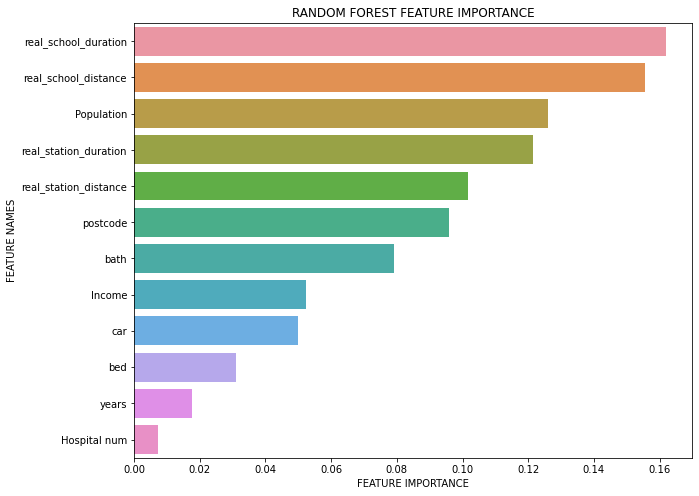

In [27]:
# https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html#:~:text=Tree%20based%20machine%20learning%20algorithms,trying%20to%20predict%20the%20target.
def plot_feature_importance(importance,names,model_type):

# Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

# Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

# Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

# Define size of bar plot
    plt.figure(figsize=(10,8))
# Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
# Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
plot_feature_importance(rf.feature_importances_,X.columns,'RANDOM FOREST')